<a href="https://colab.research.google.com/github/nayun12/Tobigs_17/blob/main/%5B%ED%88%AC%EB%B9%85%EC%8A%A4_17%EA%B8%B0_%EC%A0%95%EA%B7%9C%EC%84%B8%EC%85%98%5D_5%EC%A3%BC%EC%B0%A8_Time_Series_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd

data = pd.read_csv('/content/kingage_with_date.csv', index_col = 0)
data.head()

,age
date,
1981-01-01,60
1982-01-01,43
1983-01-01,67
1984-01-01,50
1985-01-01,56


## 1. 모형 식별

데이터를 간단히 시계열 그래프로 그려보면 다음과 같다.

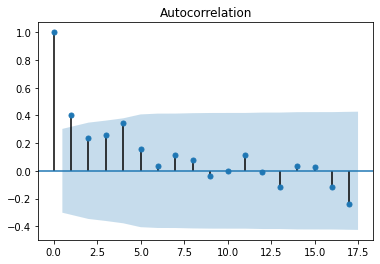

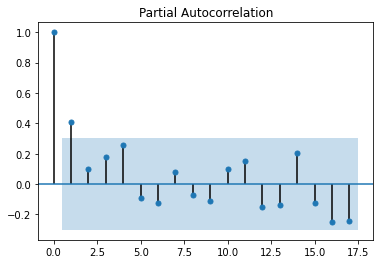

In [27]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plot_pacf(data)
plt.show()

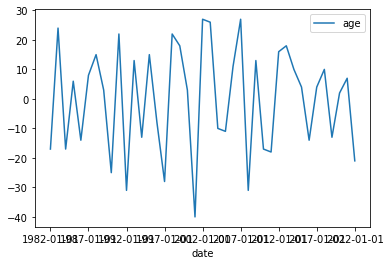

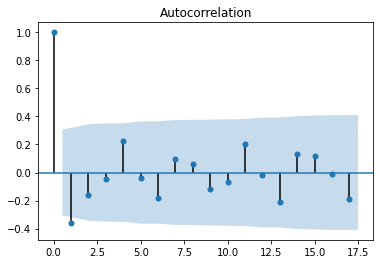

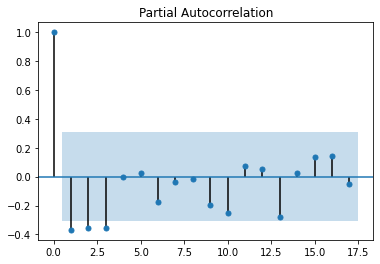

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=data.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

## 2. 모수 추정

차분 이후의 ACF와 PACF를 보니 시계열이 정상상태로 생각되므로 ARIMA(0,1,1)을 사용한다.

In [29]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.age   No. Observations:                   41
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -169.907
Method:                       css-mle   S.D. of innovations             15.108
Date:                Tue, 01 Mar 2022   AIC                            345.814
Time:                        09:32:04   BIC                            350.954
Sample:                    01-01-1982   HQIC                           347.686
                         - 01-01-2022                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3881      0.652      0.595      0.555      -0.890       1.666
ma.L1.D.age    -0.7463      0.128     -5.837      0.000      -0.997      -0.496
                                    Roots       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


const는 유효하지 않으므로 파라미터를 수정한다.

In [31]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.age   No. Observations:                   41
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -170.064
Method:                       css-mle   S.D. of innovations             15.180
Date:                Tue, 01 Mar 2022   AIC                            344.128
Time:                        09:40:25   BIC                            347.555
Sample:                    01-01-1982   HQIC                           345.376
                         - 01-01-2022                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.age    -0.7218      0.121     -5.976      0.000      -0.958      -0.485
                                    Roots                                    
                  Real          Imaginary         

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


## 3. 모형 적합성 진단

t-test값이 더 좋아졌고 자기상관성이 없다고 보여진다.

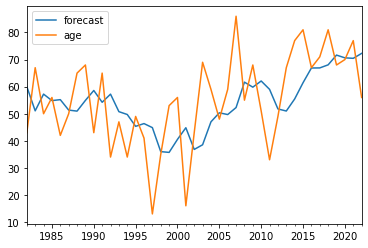

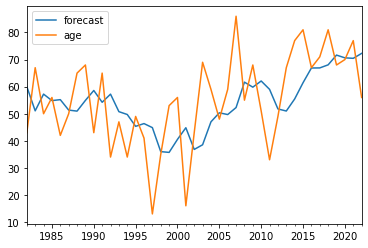

In [32]:
model_fit.plot_predict()

## 4. 모형 확정 및 예측 (예측값 17개 출력하기)

In [33]:
fore = model_fit.forecast(steps=17)
print(fore)

(array([67.75061058, 67.75061058, 67.75061058, 67.75061058, 67.75061058,
       67.75061058, 67.75061058, 67.75061058, 67.75061058, 67.75061058,
       67.75061058, 67.75061058, 67.75061058, 67.75061058, 67.75061058,
       67.75061058, 67.75061058]), array([15.18016182, 15.7568103 , 16.31308765, 16.85101143, 17.37228667,
       17.87836967, 18.37051604, 18.84981744, 19.31723001, 19.77359687,
       20.21966594, 20.65610439, 21.0835103 , 21.50242229, 21.9133275 ,
       22.31666821, 22.71284742]), array([[ 37.99804013,  97.50318103],
       [ 36.86782989,  98.63339127],
       [ 35.77754632,  99.72367484],
       [ 34.72323507, 100.77798609],
       [ 33.70155438, 101.79966678],
       [ 32.70964993, 102.79157123],
       [ 31.74506076, 103.7561604 ],
       [ 30.80564728, 104.69557388],
       [ 29.88953548, 105.61168568],
       [ 28.99507287, 106.50614829],
       [ 28.12079355, 107.38042761],
       [ 27.26538991, 108.23583125],
       [ 26.42768973, 109.07353143],
       [ 25.6066